In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from utils import *

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
model_1_data = pd.read_csv('model_1/model_2_data.csv')

In [3]:
same = model_1_data[model_1_data['sk_recipient_id'] == model_1_data['player_1']]

In [6]:
len(same)/len(model_1_data)

0.9483600837404047

In [35]:
model_1_data.columns

Index(['sk_match_id', 'frame', 'minute', 'player_name', 'pass_recipient_name',
       'pass_recipient_id', 'pass_recipient_position', 'sk_player_id',
       'pass_angle', 'type_primary', 'type_secondary', 'location_x',
       'location_y', 'pass_accurate', 'team_name', 'possession_team_name',
       'possession_team_name_src', 'possession_types', 'period',
       'receive_frame', 'receive_x', 'receive_y', 'target_area', 'ball_x_0',
       'ball_y_0', 'ball_x_1', 'ball_y_1', 'player_x_1', 'player_y_1',
       'player_1', 'ball_x_2', 'ball_y_2', 'player_x_2', 'player_y_2',
       'player_2', 'ball_x_3', 'ball_y_3', 'player_x_3', 'player_y_3',
       'player_3', 'sk_recipient_id', 'long_name', 'dist_0', 'dist_1',
       'dist_2', 'dist_3', 'score_1', 'score_2', 'score_3', 'attack_score',
       'defend_score', 'SoF', 'defender_box_count', 'attacker_count',
       'defender_count', 'team', 'paired_player', 'min_distance', 'score_diff',
       'success', 'ball_dist_1'],
      dtype='object'

In [41]:
cols = ['sk_match_id', 'frame', 'SoF', 'success', 'defender_box_count','player_name', 'pass_recipient_name', 'sk_player_id', 'receive_frame', 'player_1', 'min_distance']

In [59]:
model_1_data[model_1_data['sk_recipient_id'] != model_1_data['player_1']][cols]

,sk_match_id,frame,player_name,pass_recipient_name,sk_player_id,SoF,success,receive_frame,player_1,min_distance
2,1133199,1788,J. Rytting Kaneryd,J. Rytting Kaneryd,63556.0,5.143659,0,1788.0,NaN,0.772010
11,1133199,19926,M. Mjelde,J. Rytting Kaneryd,22354.0,26.809008,0,19985.0,NaN,0.434166
17,1133199,23411,A. Neville,G. Clinton,68736.0,11.884837,0,23412.0,NaN,2.225062
30,1133199,59927,J. Carter,N. Charles,57093.0,114.927281,0,59939.0,NaN,2.046876
32,1133199,61235,M. Fishel,J. Canković,769835.0,18.812781,0,61241.0,NaN,1.876726
33,1133199,32681,M. Fishel,N. Charles,769835.0,311.580042,0,32689.0,NaN,2.332595
48,1133199,42713,A. Neville,G. Clinton,68736.0,38.033039,0,42720.0,NaN,5.442426
49,1133199,46729,M. Fishel,L. James,769835.0,10.095899,0,46734.0,68736.0,2.515572
72,1133199,58113,M. Leupolz,M. Fishel,22435.0,7.294558,0,58125.0,NaN,1.248079
78,1133200,48539,Y. Hasegawa,A. Greenwood,22684.0,17.707686,1,48539.0,258918.0,5.882329


In [30]:
model_1_data.shape

(5730, 61)

In [21]:
model_1_data['team'] = model_1_data['team'].apply(lambda x: 1 if x == 'home' else 0)

In [22]:
sampled_df = (
    model_1_data.groupby('sk_match_id', group_keys=False)
      .apply(lambda group: group.sample(frac=0.6, random_state=42))
)

In [23]:
model_df = model_1_data.loc[model_1_data.index.difference(sampled_df.index)]

In [4]:
#model_df = model_1_data.copy()

In [24]:
features = ["score_diff", "SoF", "attacker_count", "defender_count", "team", "defender_box_count"]
target = "success"

In [25]:
model_df = model_df[features+[target]]

In [9]:
model_df.isna().sum()

score_diff            0
SoF                   0
attacker_count        0
defender_count        0
team                  0
defender_box_count    0
success               0
dtype: int64

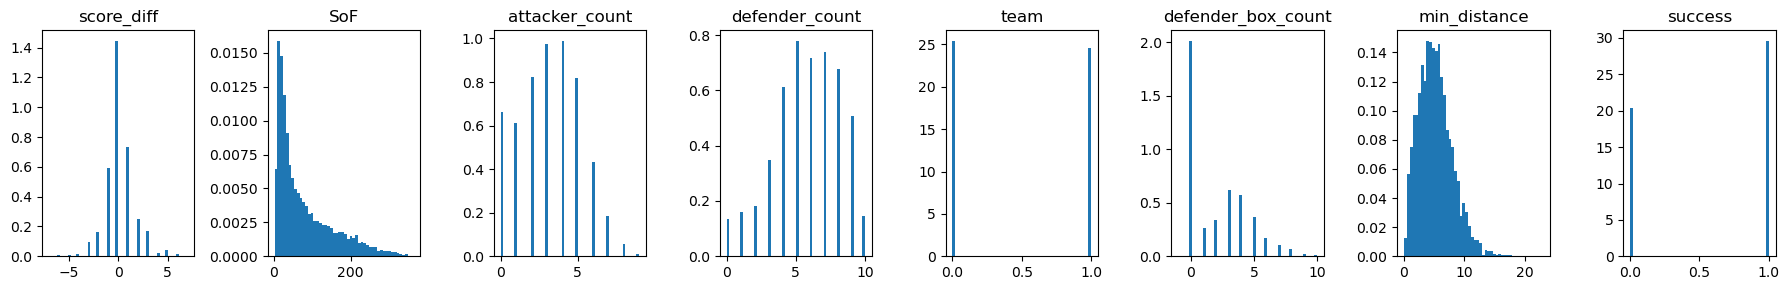

In [110]:
plt.figure(figsize=(18,3))

for i, col in enumerate(features+[target]):
    plt.subplot(1, 8, i+1)
    plt.hist(model_df[col], bins=50, density=True)
    plt.title(col)

plt.tight_layout()
plt.show()

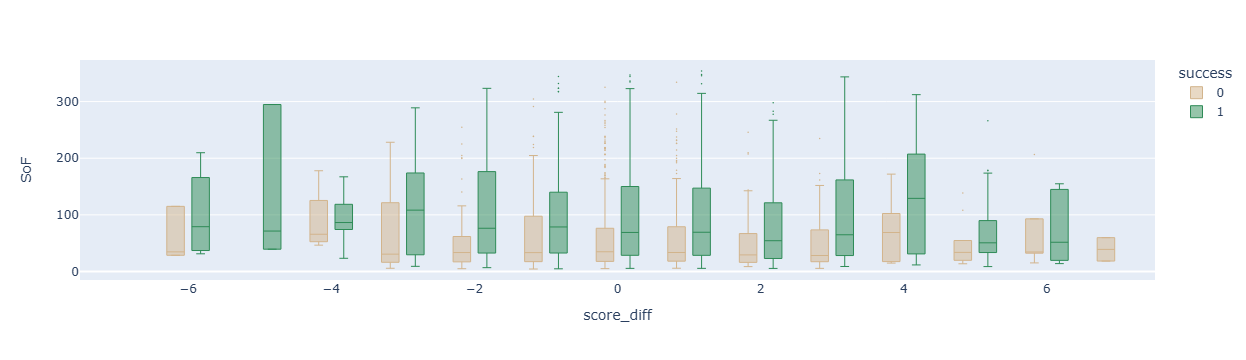

In [34]:
fig = px.box(
    model_df,
    x="score_diff",
    y="SoF",
    color="success",
    color_discrete_map={1: "seagreen", 0: "tan"}  # Map specific colors
)

# Update the quartile method and style
fig.update_traces(
    quartilemethod="exclusive", marker=dict(size=1.5),
    line_width=1  # Remove edge lines
)

# Show the plot
fig.show()

In [43]:
model_df[target].value_counts()

success
1    2050
0    1394
Name: count, dtype: int64

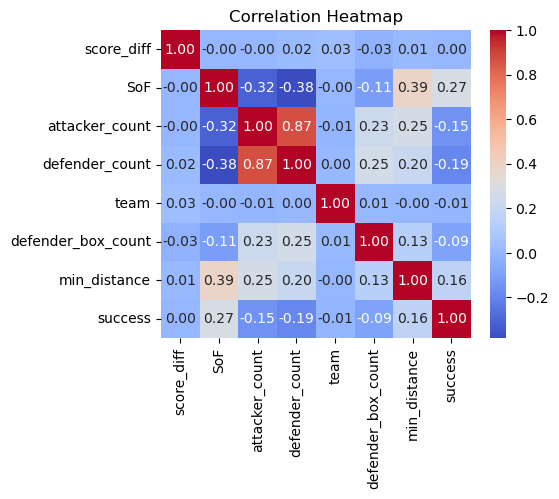

In [128]:
correlation_matrix = model_df[features + [target]].corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [26]:
X = model_df[features]
y = model_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [27]:
models = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [None, 10, 20],
        },
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
        },
    },
    "LogisticRegression": {
        "model": LogisticRegression(random_state=42, max_iter=500),
        "params": {
            "C": [0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["liblinear", "lbfgs"],
        },
    },
    "KNeighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
        },
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
        "params": {
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
        },
    },
}

# Perform GridSearchCV for each model
best_models = {}
for name, entry in models.items():
    print(f"Optimizing {name}...")
    grid = GridSearchCV(entry["model"], entry["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best cross-validated accuracy for {name}: {grid.best_score_:.4f}\n")

# Compare performance on the test set
print("Performance Comparison:")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

Optimizing RandomForest...
Best params for RandomForest: {'max_depth': None, 'n_estimators': 100}
Best cross-validated accuracy for RandomForest: 0.6212

Optimizing GradientBoosting...
Best params for GradientBoosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
Best cross-validated accuracy for GradientBoosting: 0.6222

Optimizing LogisticRegression...
Best params for LogisticRegression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validated accuracy for LogisticRegression: 0.6191

Optimizing KNeighbors...
Best params for KNeighbors: {'n_neighbors': 7, 'weights': 'distance'}
Best cross-validated accuracy for KNeighbors: 0.6375

Optimizing XGBoost...
Best params for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
Best cross-validated accuracy for XGBoost: 0.6171

Performance Comparison:
Model: RandomForest
Accuracy: 0.6150
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.

Feature Importances for RandomForest:
              Feature  Importance
0                 SoF    0.470542
1          score_diff    0.132710
2  defender_box_count    0.122189
3      defender_count    0.120612
4      attacker_count    0.113454
5                team    0.040492


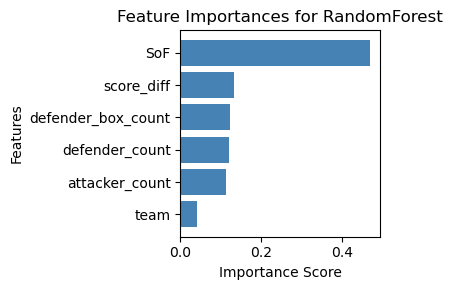

Feature Importances for GradientBoosting:
              Feature  Importance
0                 SoF    0.615144
1  defender_box_count    0.244573
2      defender_count    0.085840
3          score_diff    0.047901
4      attacker_count    0.006542
5                team    0.000000


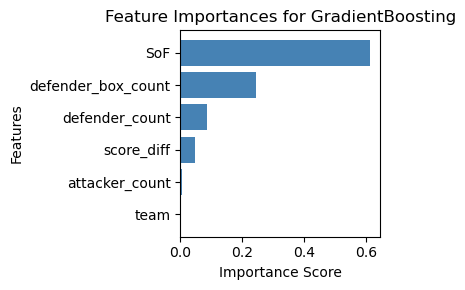

Feature Importances for XGBoost:
              Feature  Importance
0                 SoF    0.389003
1  defender_box_count    0.301087
2          score_diff    0.131923
3      defender_count    0.126307
4      attacker_count    0.051679
5                team    0.000000


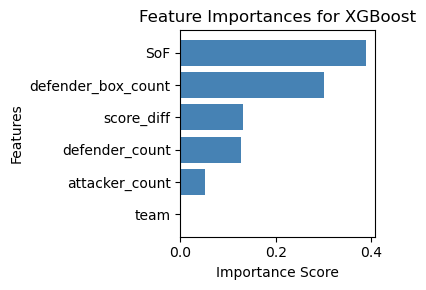

In [12]:
for name, model in best_models.items():
    if hasattr(model, "feature_importances_"):
        print(f"Feature Importances for {name}:")
        
        # Extract feature importance
        feature_importances = model.feature_importances_
        sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order
        
        # Create a DataFrame for better visualization
        importance_df = pd.DataFrame({
            "Feature": X_train.columns[sorted_idx],
            "Importance": feature_importances[sorted_idx],
        })
        
        print(importance_df)
        
        # Plot the feature importance
        plt.figure(figsize=(4, 3))
        plt.barh(
            importance_df["Feature"], 
            importance_df["Importance"], 
            color="steelblue"
        )
        plt.gca().invert_yaxis()  # Reverse the order for better readability
        plt.title(f"Feature Importances for {name}")
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.show()

In [13]:
#sampled_df = model_1_data

In [28]:
logistic_model = best_models["LogisticRegression"]

# Prepare the features from sampled_df
X_sampled = sampled_df[X_train.columns]  # Ensure the same features as X_train

# Predict using the Logistic Regression model
sampled_df_predictions = logistic_model.predict(X_sampled)

# Add predictions to sampled_df
sampled_df["predictions"] = sampled_df_predictions

In [29]:
excellent = sampled_df[(sampled_df['predictions'] == 0) & (sampled_df['success'] == 1)]

In [30]:
all_counts = sampled_df.pass_recipient_name.value_counts()

In [31]:
excellent = excellent[excellent['pass_recipient_name'].map(excellent['pass_recipient_name'].value_counts()) >= 8]

In [156]:
match_id = 1137933
file_path = f'data/FA/match/{match_id}.json'
match_data = load_json_file(file_path)

In [158]:
[p for p in match_data['players'] if p['id'] == 771262]

[{'player_role': {'id': 3,
   'position_group': 'Central Defender',
   'name': 'Left Center Back',
   'acronym': 'LCB'},
  'start_time': '00:00:00',
  'end_time': None,
  'number': 4,
  'yellow_card': 0,
  'red_card': 0,
  'injured': False,
  'goal': 0,
  'own_goal': 0,
  'team_player_id': 1156113,
  'team_id': 3325,
  'id': 771262,
  'first_name': 'Naomi',
  'last_name': 'Layzell',
  'short_name': 'N. Layzell',
  'birthday': '2004-02-29',
  'trackable_object': 772825,
  'gender': 'female'}]

In [191]:
excellent[excellent['pass_recipient_name'] == 'E. Morgan'][['sk_match_id', 'possession_team_name', 'receive_frame', 'SoF', 'player_1', 'player_2','receive_x', 'receive_y', 'player_x_1', 'player_y_1', 'player_x_2', 'player_y_2', 'score_1', 'score_2', 'dist_0', 'dist_1', 'dist_2']]

,sk_match_id,possession_team_name,receive_frame,SoF,player_1,player_2,receive_x,receive_y,player_x_1,player_y_1,player_x_2,player_y_2,score_1,score_2,dist_0,dist_1,dist_2
940,1169170,Manchester City,7190.0,68.877867,57072.0,22604.0,25.51,-20.86,26.99,-15.51,45.25,20.81,1,1,34.111577,29.854986,22.036756
974,1169170,Manchester City,19379.0,14.691306,57072.0,64095.0,23.58,-33.80,21.22,-26.00,0.44,-6.55,1,0,44.483777,40.674788,52.470431
1448,1227049,Manchester City,35973.0,12.460152,57072.0,22712.0,-26.86,32.83,-26.46,32.25,-22.49,15.35,0,1,40.455636,40.224173,31.940297
1857,1245010,Manchester City,4939.0,48.334325,57072.0,22684.0,17.58,-27.82,15.60,-17.85,24.16,-14.84,1,1,44.647047,40.990639,31.990330
1879,1245010,Manchester City,14381.0,44.621550,57072.0,63931.0,17.60,-29.50,15.88,-25.37,24.48,-12.37,0,1,45.697484,44.549538,30.629027
3224,1315114,Manchester City,49401.0,29.897873,57072.0,68512.0,25.00,-32.31,27.53,-31.47,30.98,-11.05,1,1,42.428600,40.172899,24.191174
3231,1315114,Manchester City,51386.0,85.525960,57072.0,57068.0,23.04,-21.76,23.02,-21.51,33.48,-14.56,0,1,36.624981,36.493157,23.953163
3233,1315114,Manchester City,52168.0,14.231182,57072.0,57070.0,38.91,-33.81,38.39,-33.80,36.73,-21.13,0,1,36.439048,36.626931,26.366073
3551,1366200,Manchester City,6973.0,24.312720,57072.0,22712.0,-31.26,33.36,-32.05,31.84,-28.42,28.15,0,1,39.547784,37.841619,37.044148
3567,1366200,Manchester City,17714.0,50.446941,57072.0,57068.0,-21.00,24.90,-22.04,24.60,-37.40,29.08,0,1,40.152958,39.153181,32.766697


In [148]:
euclidean_distance(-23.78, -22.89, -50.25, 0)

34.99447099185812

In [32]:
all_counts

pass_recipient_name
C. Kelly               142
C. Foord               108
N. Charles              88
L. Hemp                 83
S. Catley               69
B. Mead                 67
M. Fowler               59
Leila Ouahabi           58
E. Toone                53
H. Blundell             48
K. Dali                 45
L. Galton               43
K. Hanson               42
C. Bizet Ildhusøy       41
K. Robinson             41
K. Smith                40
K. Casparij             40
G. Reiten               38
J. Rytting Kaneryd      38
A. Leon                 37
A. Lawrence             37
S. Mayling              36
N. Maritz               36
L. James                36
C. Lacasse              36
P. Bremer               34
J. Riviere              34
J. Rantala              33
K. McCabe               33
L. Evans                31
E. Fox                  31
J. Roord                31
J. Naz                  30
H. Payne                29
E. Koivisto             28
C. Bott                 27
G. Clint

In [33]:
ratio = excellent.pass_recipient_name.value_counts()/all_counts
ratio[~ratio.isna()].sort_values(ascending = False)

pass_recipient_name
E. Toone              0.452830
M. Pacheco            0.450000
J. Cayman             0.444444
H. Payne              0.413793
M. Höbinger           0.409091
Laia Aleixandri       0.409091
G. Clinton            0.407407
C. Bott               0.370370
J. Nobbs              0.363636
S. Mayling            0.361111
M. Fowler             0.355932
A. Neville            0.333333
Lucía García          0.333333
J. Rantala            0.333333
J. Naz                0.333333
A. Lawrence           0.324324
C. Kelly              0.323944
Leila Ouahabi         0.310345
L. James              0.305556
C. Foord              0.296296
L. Evans              0.290323
K. Dali               0.288889
K. Hanson             0.285714
C. Lacasse            0.277778
A. Leon               0.270270
J. Rytting Kaneryd    0.263158
E. Fox                0.258065
L. Galton             0.255814
L. Hemp               0.253012
H. Blundell           0.250000
K. Robinson           0.243902
B. Mead            